# Kaggle Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand
<br>
<br>
* Bike_Sharing_Demand.csv (10,886 * 12)
  * datetime : Date + Timestamp
  * season : 1(봄), 2(여름), 3(가을), 4(겨울)
  * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
  * workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
  * weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/번개)
  * temp : 온도(섭씨)
  * atemp : 체감온도(섭씨)
  * humidity : 습도
  * windspeed : 풍속
  * casual : 사전 등록되지 않은 사용자 대여 횟수
  * registered : 사전 등록된 사용자 대여 횟수
  * count : 총 대여 횟수 -> y

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [4]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)

In [5]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


> ## 2) Drop Columns

* 'datetime', 'casual', 'registered'

In [6]:
drop_columns = ['datetime', 'casual', 'registered']

DF.drop(drop_columns, axis = 1,inplace = True)

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [9]:
DF['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [27]:
# count -> shares 열 이름 변경
DF.rename(columns={'count':'shares'}, inplace=True)
DF.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'shares', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [10]:
# 1.탐색적 데이터 분석
import matplotlib.pyplot as plt
import seaborn as sns

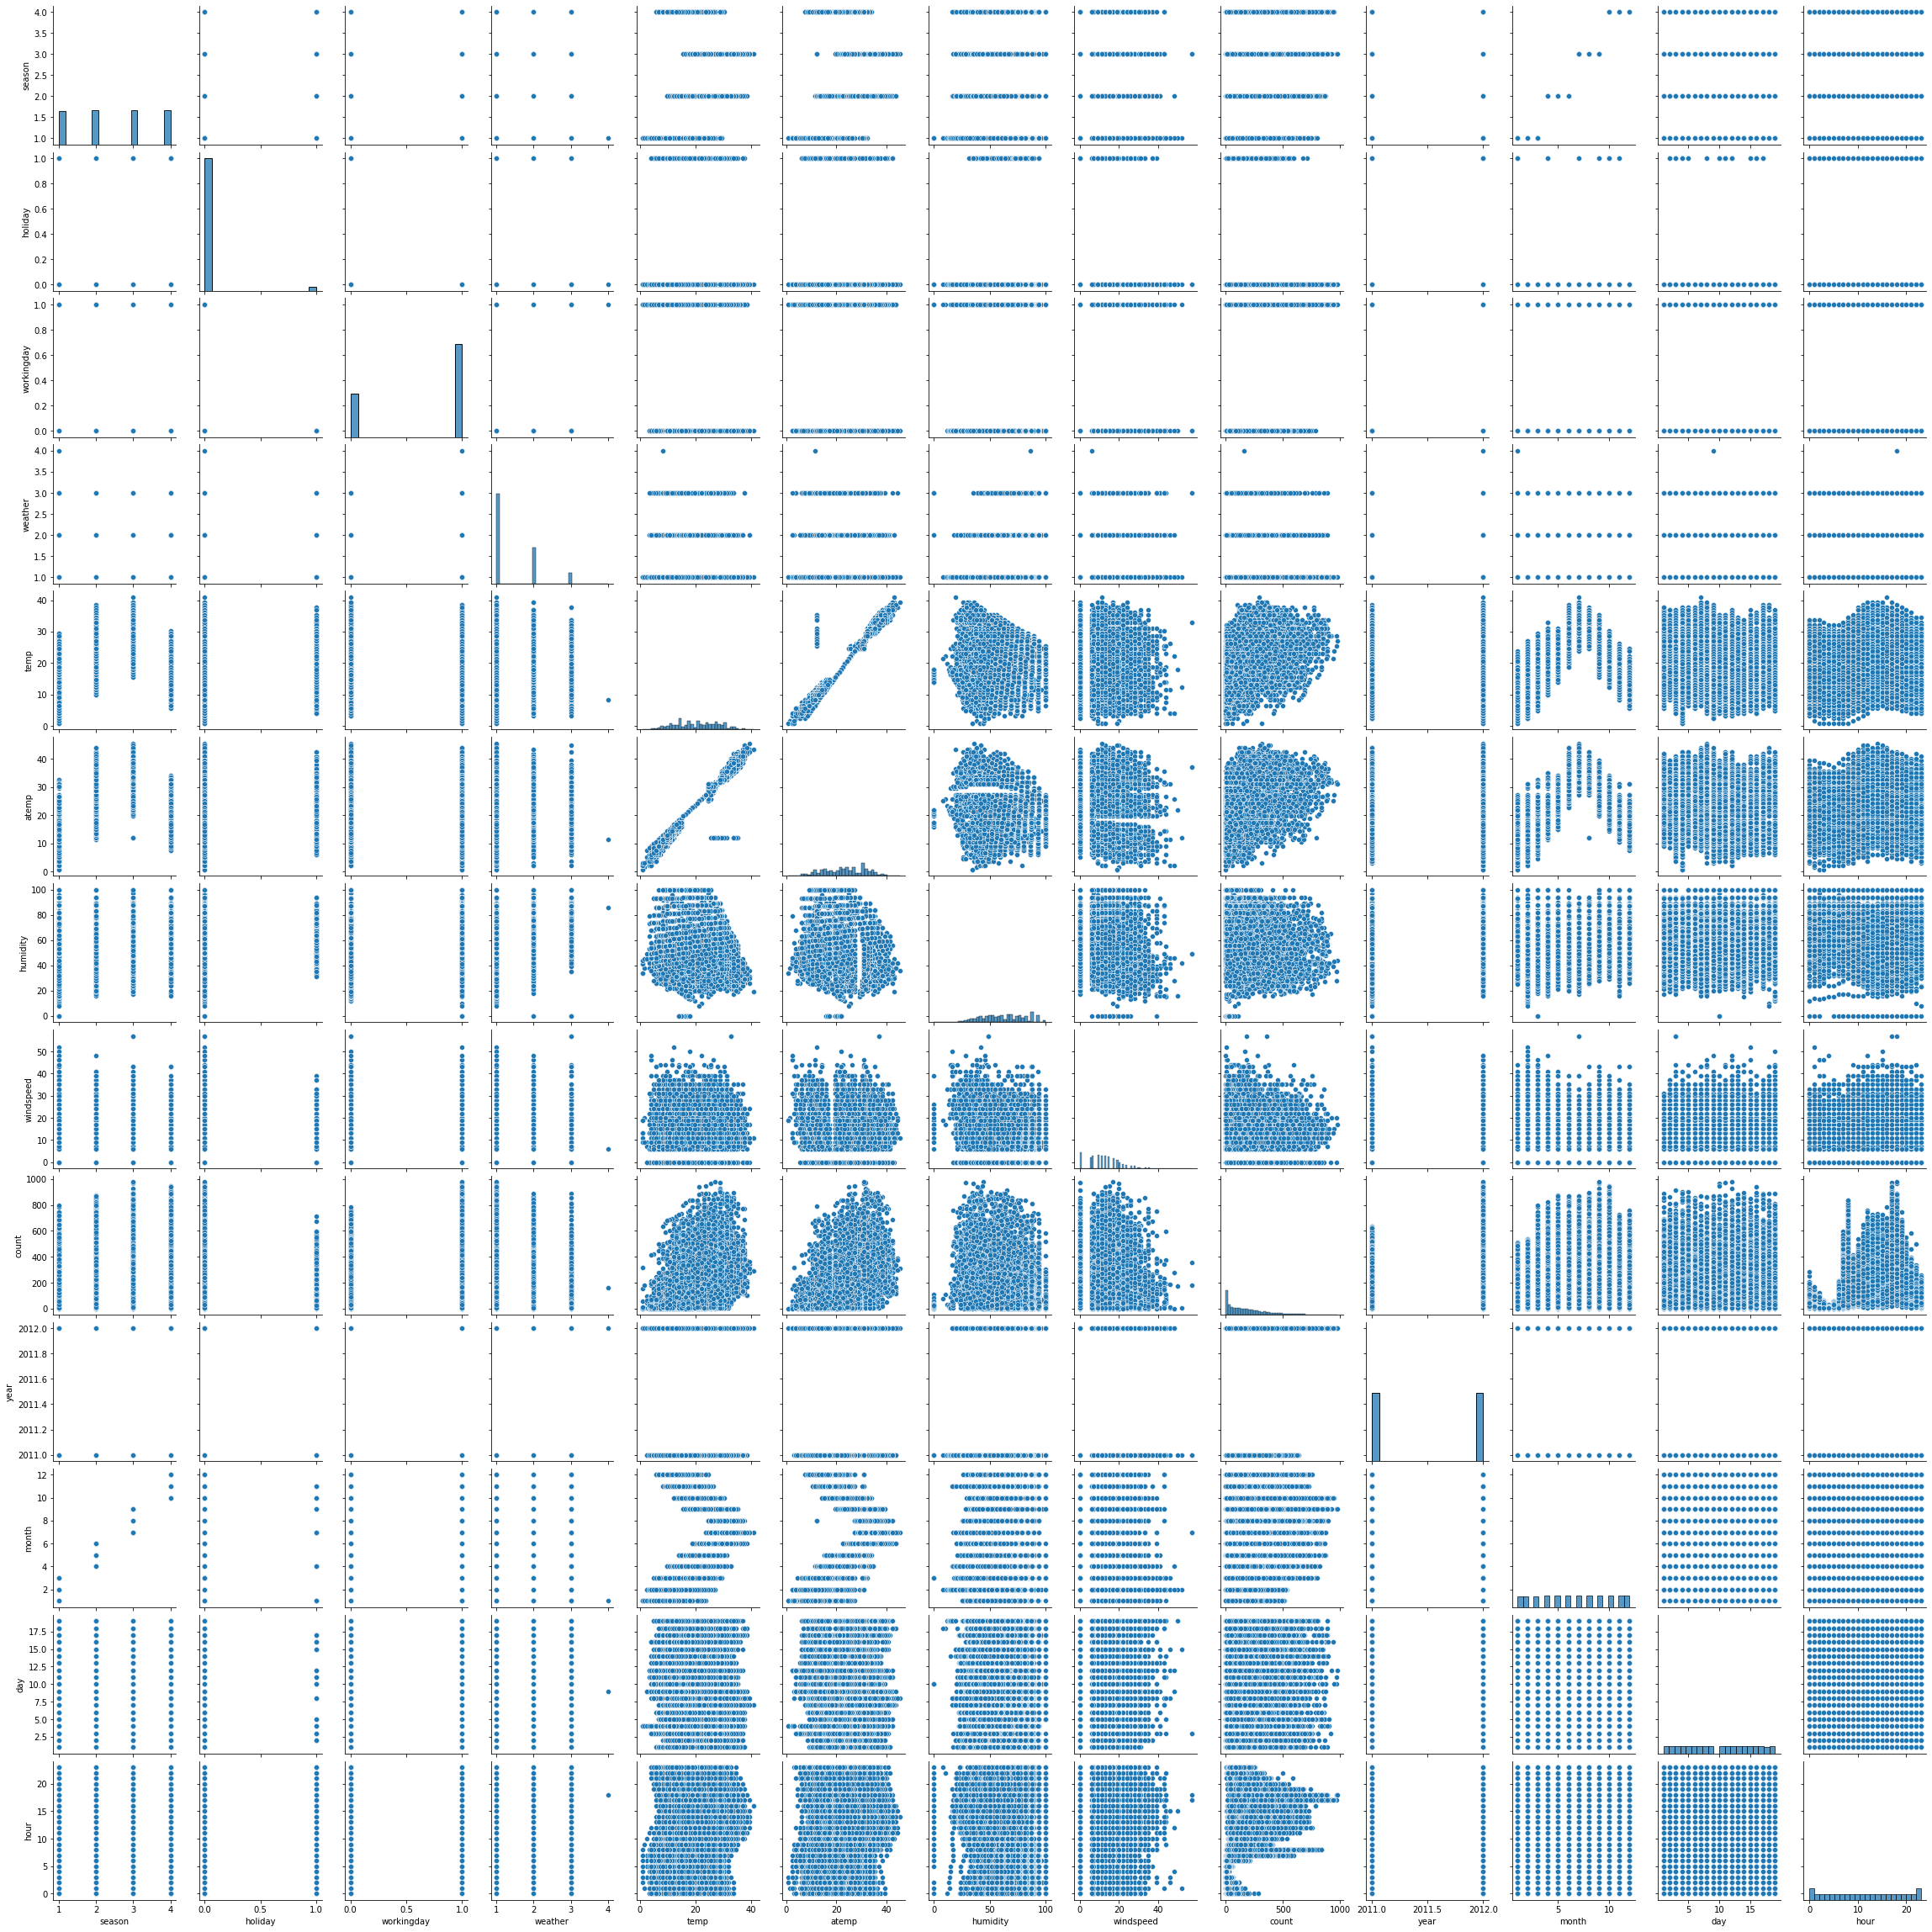

In [17]:
sns.pairplot(data=DF)

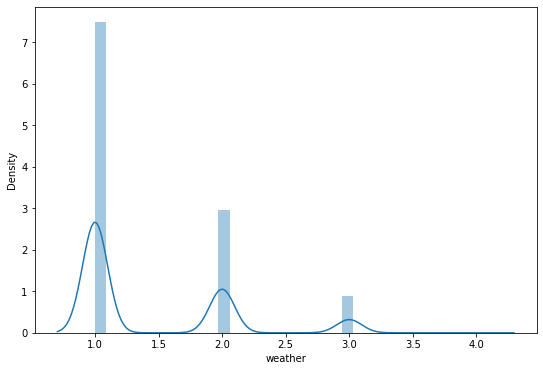

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [64]:
plt.figure(figsize=(9,6))
sns.distplot(DF.weather,
             hist=True,
             kde=True)
plt.show()
DF.weather.value_counts()

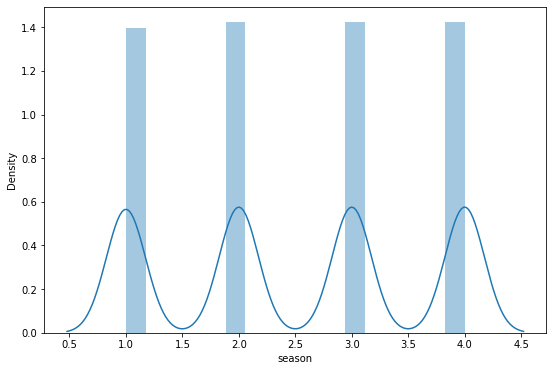

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [16]:
plt.figure(figsize=(9,6))
sns.distplot(DF.season,
             hist=True,
             kde=True)
plt.show()
DF.season.value_counts()

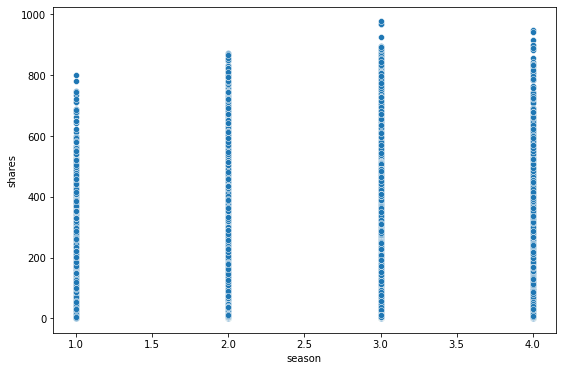

In [41]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.season, y=DF.shares)
plt.show()

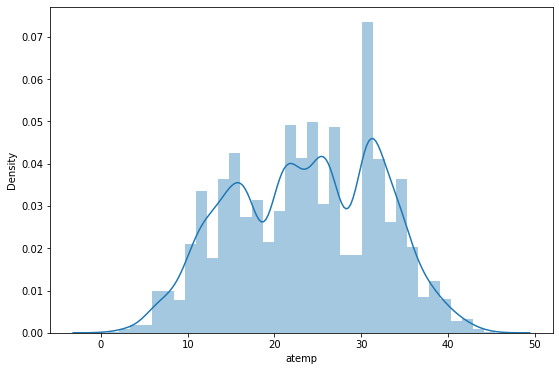

In [19]:
plt.figure(figsize=(9,6))
sns.distplot(DF.atemp,
             hist=True,
             kde=True)
plt.show()

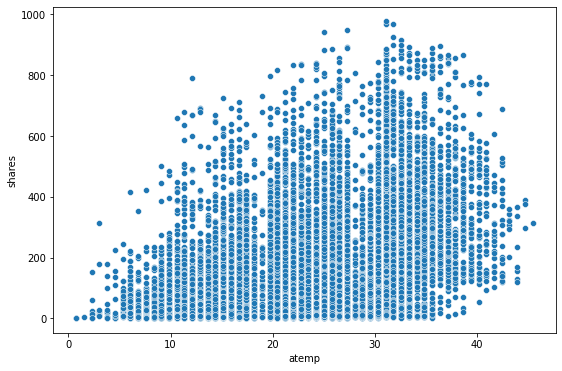

In [28]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.atemp, y=DF.shares)
plt.show()

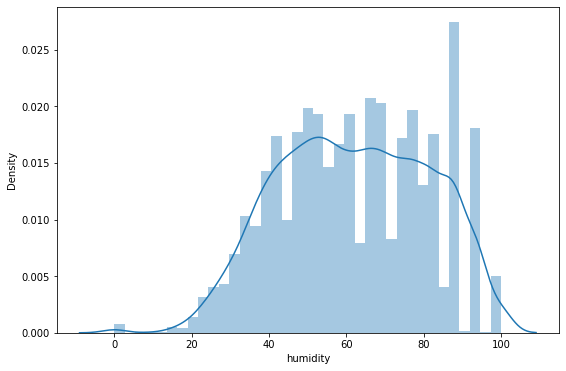

In [33]:
plt.figure(figsize=(9,6))
sns.distplot(DF.humidity,
             hist=True,
             kde=True)
plt.show()

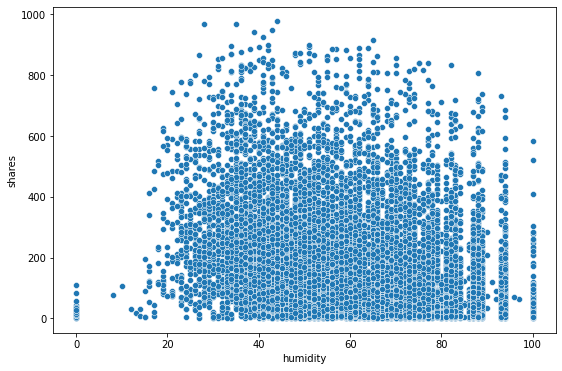

In [36]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.humidity, y=DF.shares)
plt.show()

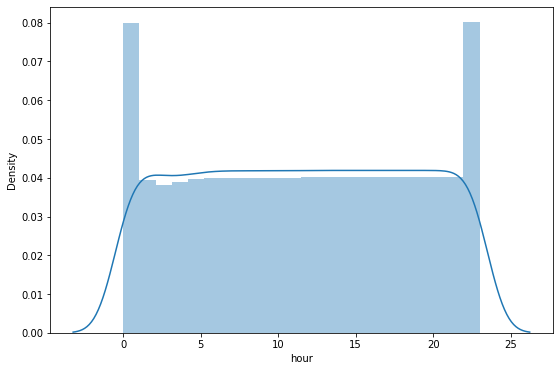

In [42]:
plt.figure(figsize=(9,6))
sns.distplot(DF.hour,
             hist=True,
             kde=True)
plt.show()

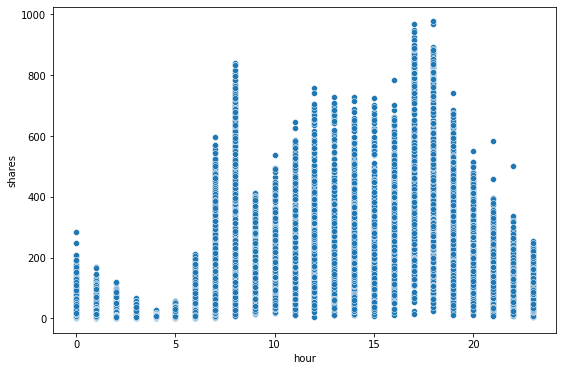

In [38]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.hour, y=DF.shares)
plt.show()

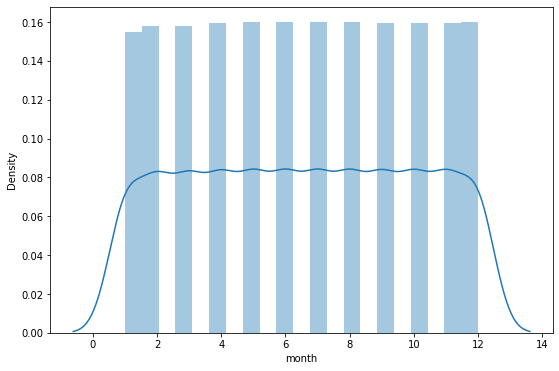

In [46]:
plt.figure(figsize=(9,6))
sns.distplot(DF.month,
             hist=True,
             kde=True)
plt.show()

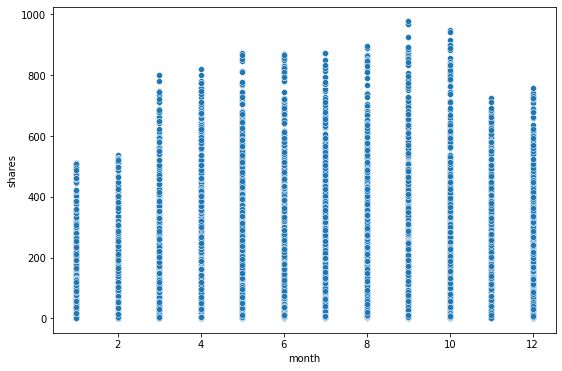

In [39]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=DF.month, y=DF.shares)
plt.show()

In [ ]:
# 2. 모델링(sklearn) 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [106]:
# shares 제외 모든 features 사용

X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour']]
y = DF['shares']

# 7:3 split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, hour')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, hour
sqrt MSE   : 139.84162314313502


In [107]:
# shares 제외 모든 features 사용

X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour']]
y = DF['shares']

# 3:7 split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.7,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, hour')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : season, holiday, workingday, weather, temp, atemp, humidity, windspeed, year, month, day, hour
sqrt MSE   : 141.04240676066905


In [108]:
# season, atemp, humidity, month, weather


X = DF[['season','atemp', 'humidity', 'month', 'weather']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : season, atemp, humidity, month, weather')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : season, atemp, humidity, month, weather
sqrt MSE   : 153.84484964795368


In [109]:
# atemp

X = DF[['atemp']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp
sqrt MSE   : 165.5534289740358


In [110]:
# atemp, humidity

X = DF[['atemp', 'humidity']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity
sqrt MSE   : 156.0965623978468


In [111]:
# humidity, hour
X = DF[['humidity', 'hour']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : humidity, hour')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : humidity, hour
sqrt MSE   : 158.65607542458514


In [118]:
# atemp, hour
X = DF[['atemp', 'hour']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, hour')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, hour
sqrt MSE   : 152.3317721363832


In [112]:
# atemp, humidity, hour

X = DF[['atemp', 'humidity', 'hour']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour
sqrt MSE   : 147.10397861121783


In [113]:
# atemp, humidity, hour, month

X = DF[['atemp', 'humidity', 'hour', 'month']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour, month')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour, month
sqrt MSE   : 145.07348406785778


In [114]:
# atemp, humidity, hour, month, weather

X = DF[['atemp', 'humidity', 'hour', 'month', 'weather']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour, month, weather')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour, month, weather
sqrt MSE   : 145.06879320022315


In [115]:
# atemp, humidity, hour, month, workingday

X = DF[['atemp', 'humidity', 'hour', 'month', 'workingday']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour, month, workingday')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour, month, workingday
sqrt MSE   : 145.08265002863652


In [116]:
# atemp, humidity, hour, month, day

X = DF[['atemp', 'humidity', 'hour', 'month', 'day']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour, month, day')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour, month, day
sqrt MSE   : 145.0735402975564


In [117]:
# atemp, humidity, hour, month, windspeed

X = DF[['atemp', 'humidity', 'hour', 'month', 'windspeed']]
y = DF['shares']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=100)
# .fit()
RA = LinearRegression()
RA.fit(X_train, y_train)

# .predict()
y_hat = RA.predict(X_test)

# 오차값 확인
MSE = mean_squared_error(y_test, y_hat)
print('Feature(s) : atemp, humidity, hour, month, windspeed')
print('sqrt MSE   :', np.sqrt(MSE))

Feature(s) : atemp, humidity, hour, month, windspeed
sqrt MSE   : 145.05920661763963


# 
# 
# 
# The End
# 
# 
# 